In [59]:
import numpy as np
import pandas as pd

### product 파일

In [60]:
product = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/data/drop_product.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",",
                     usecols = [0,1,2,3,5,6])
product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT
0,4139680,07605037,12,642112,39000,1
1,4140076,10189797,13,570603,39000,2
2,4142395,06158159,85,179538,39000,1
3,4144914,07935714,12,554336,39000,1
4,4144917,06406509,78,190306,39000,5


In [61]:
product.isna().sum()

CLNT_ID      0
SESS_ID      0
HITS_SEQ     0
PD_C         0
PD_BUY_AM    0
PD_BUY_CT    0
dtype: int64

### custom 파일

In [62]:
custom = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/data/04.Custom.csv', dtype={"CLNT_ID":np.str})
custom.head()

,CLNT_ID,CLNT_GENDER,CLNT_AGE
0,4830726,F,30
1,4830874,F,40
2,4830975,F,30
3,4831275,F,30
4,4825325,F,30


In [63]:
dummies = pd.get_dummies(custom['CLNT_GENDER'], prefix='GENDER')
custom = pd.concat([custom, dummies], axis=1)
custom.drop("CLNT_GENDER", axis=1, inplace=True)
custom.head()

,CLNT_ID,CLNT_AGE,GENDER_F,GENDER_M
0,4830726,30,1,0
1,4830874,40,1,0
2,4830975,30,1,0
3,4831275,30,1,0
4,4825325,30,1,0


In [5]:
custom.shape

(671679, 4)

In [91]:
m1 = pd.merge(product, custom, on='CLNT_ID', how = 'inner')
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT,CLNT_AGE,GENDER_F,GENDER_M
0,4140076,10189797,13,570603,39000,2,40,1,0
1,4140076,10342512,23,422358,39900,1,40,1,0
2,4140076,06526651,22,196272,47600,1,40,1,0
3,4140076,08326529,199,305965,46700,1,40,1,0
4,4140076,08891563,19,305965,46700,1,40,1,0


In [7]:
m1.shape

(3983837, 9)

### Session 파일

In [93]:
session = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/data/new_session.csv', dtype={"CLNT_ID":np.str, "SESS_ID":np.str},thousands=",",
                     usecols=[0,1,3,4,5,6,7])
session.head()

,CLNT_ID,SESS_ID,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM
0,5873599,08641867,20180509,82.0,1890.0,mobile,Daejeon
1,5873599,06616320,20180611,105.0,1604.0,mobile,Busan
2,5873599,05886172,20180624,41.0,632.0,mobile,Daejeon
3,5873884,01050889,20180913,160.0,1035.0,mobile,Gyeonggi-do
4,5874461,10298270,20180412,13.0,298.0,mobile,Seoul


In [94]:
session.isna().sum()

CLNT_ID                0
SESS_ID                0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
dtype: int64

In [95]:
session.dropna(inplace=True)
session.isna().sum()

CLNT_ID            0
SESS_ID            0
SESS_DT            0
TOT_PAG_VIEW_CT    0
TOT_SESS_HR_V      0
DVC_CTG_NM         0
ZON_NM             0
dtype: int64

In [96]:
session['SESS_DT'] = pd.to_datetime(session['SESS_DT'], format="%Y%m%d")
session['SESS_month'] = pd.DatetimeIndex(session['SESS_DT']).month
session.head()

,CLNT_ID,SESS_ID,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,SESS_month
0,5873599,08641867,2018-05-09,82.0,1890.0,mobile,Daejeon,5
1,5873599,06616320,2018-06-11,105.0,1604.0,mobile,Busan,6
2,5873599,05886172,2018-06-24,41.0,632.0,mobile,Daejeon,6
3,5873884,01050889,2018-09-13,160.0,1035.0,mobile,Gyeonggi-do,9
4,5874461,10298270,2018-04-12,13.0,298.0,mobile,Seoul,4


In [97]:
session['ZON_NM'].value_counts()

Seoul                1013367
Gyeonggi-do           467583
Busan                 294508
Gyeongsangnam-do      128177
Daegu                 116189
Incheon               100249
Gyeongsangbuk-do       90806
Jeollabuk-do           78160
Chungcheongnam-do      77714
Gwangju                70531
Daejeon                60196
Jeollanam-do           49078
Ulsan                  46393
Chungcheongbuk-do      44241
Gangwon-do             42494
Jeju-do                19010
Name: ZON_NM, dtype: int64

In [98]:
#categorical variable to dummy
categorical_features = ['DVC_CTG_NM', 'ZON_NM', 'SESS_month']
prefix_name = ["DVC","ZON","month"]

for i in range(3):
    dummies = pd.get_dummies(session[categorical_features[i]], prefix=prefix_name[i])
    session = pd.concat([session, dummies], axis=1)
    session.drop(categorical_features[i], axis=1, inplace=True)
session.head()

,CLNT_ID,SESS_ID,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,5873599,08641867,2018-05-09,82.0,1890.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5873599,06616320,2018-06-11,105.0,1604.0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,5873599,05886172,2018-06-24,41.0,632.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5873884,01050889,2018-09-13,160.0,1035.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5874461,10298270,2018-04-12,13.0,298.0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [99]:
m1 = pd.merge(m1, session, on=['CLNT_ID','SESS_ID'], how = 'inner')
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT,CLNT_AGE,GENDER_F,GENDER_M,SESS_DT,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,4140076,10189797,13,570603,39000,2,40,1,0,2018-04-13,...,0,0,0,0,1,0,0,0,0,0
1,4140076,10189797,13,411029,29000,1,40,1,0,2018-04-13,...,0,0,0,0,1,0,0,0,0,0
2,4140076,10342512,23,422358,39900,1,40,1,0,2018-04-11,...,0,0,0,0,1,0,0,0,0,0
3,4140076,10342512,23,403243,57000,1,40,1,0,2018-04-11,...,0,0,0,0,1,0,0,0,0,0
4,4140076,10342512,23,806382,16000,1,40,1,0,2018-04-11,...,0,0,0,0,1,0,0,0,0,0


### master

In [100]:
master = pd.read_csv('C:/Users/wjssm/Desktop/lpoint/data/06.Master.csv',
                     usecols=[0,5])
master.head()

,PD_C,CLAC0_NM
0,64382,스포츠/레저
1,62282,패션의류
2,61729,유아동
3,61537,패션의류
4,58820,패션의류


In [101]:
labels, uniques = pd.factorize(master['CLAC0_NM'],sort=True)
print(uniques)

Index(['가구/침구/인테리어', '가전/디지털', '반려동물', '스포츠/레저', '식품', '여행/서비스/금융', '유아동',
       '주방/생활/건강', '패션의류', '화장품/뷰티'],
      dtype='object')


In [88]:
pd.get_dummies(labels, prefix='CLAC0')

,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0


In [102]:
dummies = pd.get_dummies(labels, prefix='CLAC0')
master = pd.concat([master, dummies], axis=1)
master.drop("CLAC0_NM", axis=1, inplace=True)
master.head()

,PD_C,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,64382,0,0,0,1,0,0,0,0,0,0
1,62282,0,0,0,0,0,0,0,0,1,0
2,61729,0,0,0,0,0,0,1,0,0,0
3,61537,0,0,0,0,0,0,0,0,1,0
4,58820,0,0,0,0,0,0,0,0,1,0


In [103]:
m1 = pd.merge(m1, master, on=['PD_C'], how = 'inner')
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT,CLNT_AGE,GENDER_F,GENDER_M,SESS_DT,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,4140076,10189797,13,570603,39000,2,40,1,0,2018-04-13,...,0,0,0,1,0,0,0,0,0,0
1,4148106,06537318,21,570603,39000,1,30,1,0,2018-06-13,...,0,0,0,1,0,0,0,0,0,0
2,4148106,06662803,94,570603,39000,1,30,1,0,2018-06-11,...,0,0,0,1,0,0,0,0,0,0
3,5298612,04443505,129,570603,39000,1,30,1,0,2018-07-17,...,0,0,0,1,0,0,0,0,0,0
4,5553084,06453463,55,570603,39000,1,30,1,0,2018-06-14,...,0,0,0,1,0,0,0,0,0,0


In [104]:
m1.shape

(3970214, 47)

In [73]:
m1.columns

Index(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'PD_C', 'PD_BUY_AM', 'PD_BUY_CT',
       'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'SESS_DT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'CLAC0_NM'],
      dtype='object')

In [105]:
m1_mean = m1.groupby(['CLNT_ID'])['HITS_SEQ','PD_BUY_AM','PD_BUY_CT','TOT_PAG_VIEW_CT','TOT_SESS_HR_V','CLNT_AGE','GENDER_F','GENDER_M'].agg(['mean'])
m1_mean.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M
,mean,mean,mean,mean,mean,mean,mean,mean
CLNT_ID,,,,,,,,
0000008,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1
0000014,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0
0000032,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1
0000056,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0
0000058,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0


In [106]:
m1_factor = m1.loc[:, m1.columns.str.startswith('DVC') | m1.columns.str.startswith('ZON') | 
                   m1.columns.str.startswith('month') | m1.columns.str.startswith('CLAC0')]
m1_factor.head()

,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,ZON_Chungcheongnam-do,ZON_Daegu,ZON_Daejeon,ZON_Gangwon-do,ZON_Gwangju,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [107]:
m1_sum = pd.concat([m1['CLNT_ID'], m1_factor], axis=1).groupby(['CLNT_ID']).agg(['sum'])
m1_sum.head()

,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,ZON_Chungcheongnam-do,ZON_Daegu,ZON_Daejeon,ZON_Gangwon-do,ZON_Gwangju,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,0.0,2.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000014,0.0,2.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000032,0.0,5.0,0,5.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
0000056,0.0,3.0,0,3.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
0000058,0.0,6.0,0,6.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


#### clustering에 사용할 column
- HITS_SEQ, PD_BUY_AM, PD_BUY_CT, CLNT_AGE
- GENDER...
- TOT_PAG_VIEW_CT, TOT_SESS_HR_V
- DVC...
- ZON...
- month...
- CLAC0...

In [77]:
print(m1_mean.shape)
print(m1_sum.shape)

(671470, 8)
(671470, 25)


In [85]:
m1['CLAC0_NM'].shape

(3970214,)

In [108]:
m2 = pd.concat([m1_mean, m1_sum ], axis=1)
m2.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
,mean,mean,mean,mean,mean,mean,mean,mean,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000014,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000032,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0.0,5.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
0000056,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,0.0,3.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
0000058,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0.0,6.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


In [109]:
m2.columns = m2.columns.get_level_values(0)
m2.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,57.000000,38000.000000,1.0,46.500000,417.000000,20,0,1,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000014,284.000000,34900.000000,1.0,256.000000,7098.000000,30,1,0,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000032,58.000000,15360.000000,1.0,98.200000,2169.000000,40,0,1,0.0,5.0,...,0,0,0,0.0,0.0,0,0,0.0,5.0,0.0
0000056,47.333333,7933.333333,1.0,45.666667,1157.666667,40,1,0,0.0,3.0,...,0,0,0,0.0,0.0,0,1,0.0,0.0,2.0
0000058,209.000000,21850.000000,1.0,195.000000,3161.000000,30,1,0,0.0,6.0,...,0,0,0,1.0,0.0,0,0,0.0,5.0,0.0


In [110]:
m2.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'DVC_desktop',
       'DVC_mobile', 'DVC_tablet', 'ZON_Busan', 'ZON_Chungcheongbuk-do',
       'ZON_Chungcheongnam-do', 'ZON_Daegu', 'ZON_Daejeon', 'ZON_Gangwon-do',
       'ZON_Gwangju', 'ZON_Gyeonggi-do', 'ZON_Gyeongsangbuk-do',
       'ZON_Gyeongsangnam-do', 'ZON_Incheon', 'ZON_Jeju-do',
       'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul', 'ZON_Ulsan',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5',
       'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9'],
      dtype='object')

# Kmeans
- https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
- http://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/ (kmeans n dimension visualization)

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### 20대 여자

In [111]:
F_20 = m2.loc[(m2['GENDER_F']==1) & (m2['CLNT_AGE']==20)]
F_20.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000114,224.333333,7.700000e+04,1.0,219.000000,1259.000000,20,1,0,0.0,3.0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,3.0
0000148,18.000000,1.100000e+06,1.0,67.000000,3155.000000,20,1,0,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000200,64.500000,9.595000e+04,1.0,64.000000,1488.000000,20,1,0,0.0,4.0,...,3,0,0,0.0,0.0,0,0,0.0,0.0,1.0
0000421,78.000000,4.500000e+04,1.0,92.000000,422.000000,20,1,0,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000434,19.865385,1.140962e+04,1.0,19.326923,147.211538,20,1,0,0.0,52.0,...,0,0,0,0.0,52.0,0,0,0.0,0.0,0.0


In [82]:
F_20.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'DVC_desktop',
       'DVC_mobile', 'DVC_tablet', 'ZON_Busan', 'ZON_Chungcheongbuk-do',
       'ZON_Chungcheongnam-do', 'ZON_Daegu', 'ZON_Daejeon', 'ZON_Gangwon-do',
       'ZON_Gwangju', 'ZON_Gyeonggi-do', 'ZON_Gyeongsangbuk-do',
       'ZON_Gyeongsangnam-do', 'ZON_Incheon', 'ZON_Jeju-do',
       'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul', 'ZON_Ulsan',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9'],
      dtype='object')

In [113]:
#대대분류 삭제
F_20_drop = F_20.drop(F_20.loc[:, F_20.columns.str.startswith('CLAC0')], axis = 1)

In [114]:
mms = MinMaxScaler()
mms.fit(F_20_drop) #대대분류 뺀 column들만 갖고
F_20_transformed = mms.transform(F_20_drop)

In [31]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(F_20_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(k)

1
2
3
4
5
6
7
8
9


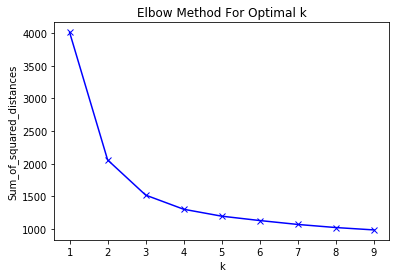

In [32]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
k=3

In [115]:
km = KMeans(n_clusters=k,algorithm='auto')
km.fit(F_20_transformed)
km_predict = pd.DataFrame(km.predict(F_20_transformed))
km_predict.columns=['predict']

In [116]:
m2.columns[:33]

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'CLNT_AGE', 'GENDER_F', 'GENDER_M', 'DVC_desktop',
       'DVC_mobile', 'DVC_tablet', 'ZON_Busan', 'ZON_Chungcheongbuk-do',
       'ZON_Chungcheongnam-do', 'ZON_Daegu', 'ZON_Daejeon', 'ZON_Gangwon-do',
       'ZON_Gwangju', 'ZON_Gyeonggi-do', 'ZON_Gyeongsangbuk-do',
       'ZON_Gyeongsangnam-do', 'ZON_Incheon', 'ZON_Jeju-do',
       'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul', 'ZON_Ulsan',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9'],
      dtype='object')

In [117]:
F_20.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000114,224.333333,7.700000e+04,1.0,219.000000,1259.000000,20,1,0,0.0,3.0,...,0,0,0,0.0,0.0,0,0,0.0,0.0,3.0
0000148,18.000000,1.100000e+06,1.0,67.000000,3155.000000,20,1,0,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000200,64.500000,9.595000e+04,1.0,64.000000,1488.000000,20,1,0,0.0,4.0,...,3,0,0,0.0,0.0,0,0,0.0,0.0,1.0
0000421,78.000000,4.500000e+04,1.0,92.000000,422.000000,20,1,0,0.0,2.0,...,0,0,0,0.0,0.0,0,0,0.0,2.0,0.0
0000434,19.865385,1.140962e+04,1.0,19.326923,147.211538,20,1,0,0.0,52.0,...,0,0,0,0.0,52.0,0,0,0.0,0.0,0.0


In [118]:
F_20_transformed = pd.DataFrame(F_20_transformed)
F_20_transformed.columns = m2.columns[:33]
F_20_transformed.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CLNT_AGE,GENDER_F,GENDER_M,DVC_desktop,DVC_mobile,...,ZON_Jeollabuk-do,ZON_Jeollanam-do,ZON_Seoul,ZON_Ulsan,month_4,month_5,month_6,month_7,month_8,month_9
0,0.447351,0.024414,0.0,0.437751,0.092655,0.0,0.0,0.0,0.0,0.015,...,0.0,0.0,0.027523,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.038961
1,0.032193,0.349198,0.0,0.132530,0.232411,0.0,0.0,0.0,0.0,0.010,...,0.0,0.0,0.018349,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.025974
2,0.125755,0.030431,0.0,0.126506,0.109535,0.0,0.0,0.0,0.0,0.020,...,0.0,0.0,0.036697,0.0,0.02,0.000000,0.040541,0.000000,0.000000,0.000000
3,0.152918,0.014255,0.0,0.182731,0.030959,0.0,0.0,0.0,0.0,0.010,...,0.0,0.0,0.000000,0.0,0.04,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.035946,0.003591,0.0,0.036801,0.010704,0.0,0.0,0.0,0.0,0.260,...,0.0,0.0,0.000000,0.0,0.16,0.176471,0.108108,0.090909,0.032258,0.090909


In [44]:
F_20_transformed.shape

(82244, 33)

In [119]:
F_20_predict = pd.concat([F_20_transformed, km_predict],axis=1)

In [120]:
F_20_predict['predict'].value_counts()

0    55800
1    21494
2     4950
Name: predict, dtype: int64

In [31]:
import matplotlib.pyplot as pyplot

In [132]:
#predict clustering 0
idx=np.where(F_20_predict['predict']==0)
F_20_0 = F_20.loc[F_20.index[idx]]
#predict clustering 1
idx=np.where(F_20_predict['predict']==1)
F_20_1 = F_20.loc[F_20.index[idx]]
#predict clustering 2
idx=np.where(F_20_predict['predict']==2)
F_20_2 = F_20.loc[F_20.index[idx]]

In [146]:
F_20_sum = F_20_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum = F_20_sum.sum()
F_20_sum/sum_of_sum

CLAC0_0    0.020740
CLAC0_1    0.032946
CLAC0_2    0.033096
CLAC0_3    0.139722
CLAC0_4    0.049731
CLAC0_5    0.006169
CLAC0_6    0.041058
CLAC0_7    0.034148
CLAC0_8    0.313245
CLAC0_9    0.329145
dtype: float64

In [163]:
print(uniques)
labels = ['furniture','electronic','pet','sports','food','travel','baby','kitchen','fashion','beauty']

Index(['가구/침구/인테리어', '가전/디지털', '반려동물', '스포츠/레저', '식품', '여행/서비스/금융', '유아동',
       '주방/생활/건강', '패션의류', '화장품/뷰티'],
      dtype='object')


In [250]:
sum_of_sum = F_20[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
sum_of_sum

CLAC0_0      6005.0
CLAC0_1      9043.0
CLAC0_2      9379.0
CLAC0_3     45001.0
CLAC0_4     13038.0
CLAC0_5      1356.0
CLAC0_6     12034.0
CLAC0_7     10128.0
CLAC0_8    110259.0
CLAC0_9     92307.0
dtype: float64

<BarContainer object of 10 artists>

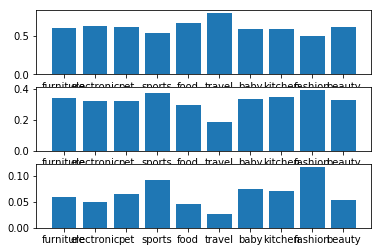

In [251]:
sum_of_sum
#clustering 0
F_20_sum = F_20_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
#sum_of_sum = F_20_sum.sum()
plt.subplot(3, 1, 1)
plt.bar(labels,F_20_sum/sum_of_sum)

#clustering 1
F_20_sum = F_20_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
#sum_of_sum = F_20_sum.sum()
plt.subplot(3, 1, 2)
plt.bar(labels,F_20_sum/sum_of_sum)

#clustering 2
F_20_sum = F_20_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
#sum_of_sum = F_20_sum.sum()
plt.subplot(3, 1, 3)
plt.bar(labels,F_20_sum/sum_of_sum)



In [252]:
m2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()

CLAC0_0     100251.0
CLAC0_1      87488.0
CLAC0_2      74620.0
CLAC0_3     645462.0
CLAC0_4     179375.0
CLAC0_5      10199.0
CLAC0_6     446668.0
CLAC0_7     205790.0
CLAC0_8    1655679.0
CLAC0_9     564682.0
dtype: float64

<BarContainer object of 10 artists>

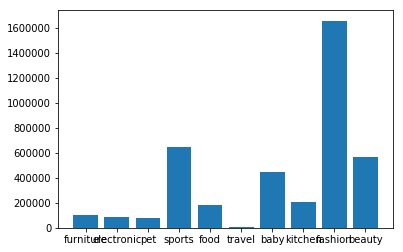

In [253]:
m2_sum = m2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()

plt.bar(labels,m2_sum)

([<matplotlib.patches.Wedge at 0x209a42578d0>,
 [Text(1.09767,0.0716215,'furniture'),
  Text(1.07007,0.25486,'electronic'),
  Text(0.994621,0.469819,'pet'),
  Text(0.608869,0.916121,'sports'),
  Text(-0.00946098,1.09996,'food'),
  Text(-0.201494,1.08139,'travel'),
  Text(-0.359137,1.03972,'baby'),
  Text(-0.592533,0.926771,'kitchen'),
  Text(-1.0956,-0.098236,'fashion'),
  Text(0.562486,-0.945309,'beauty')],
 [Text(0.598727,0.0390663,'2.1%'),
  Text(0.583674,0.139014,'3.3%'),
  Text(0.54252,0.256265,'3.3%'),
  Text(0.33211,0.499703,'14.0%'),
  Text(-0.00516054,0.599978,'5.0%'),
  Text(-0.109906,0.589848,'0.6%'),
  Text(-0.195893,0.567121,'4.1%'),
  Text(-0.3232,0.505512,'3.4%'),
  Text(-0.597603,-0.0535833,'31.3%'),
  Text(0.306811,-0.515623,'32.9%')])

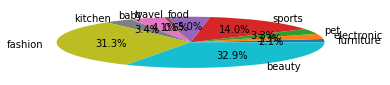

In [191]:
#clustering 0
F_20_sum = F_20_0[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 1)
plt.pie(F_20_sum, labels=labels, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x209a423c8d0>,
 [Text(1.09808,0.0648916,'furniture'),
  Text(1.07796,0.219078,'electronic'),
  Text(1.0256,0.397683,'pet'),
  Text(0.653569,0.884787,'sports'),
  Text(0.0537829,1.09868,'food'),
  Text(-0.0745848,1.09747,'travel'),
  Text(-0.207702,1.08021,'baby'),
  Text(-0.433347,1.01104,'kitchen'),
  Text(-1.0846,-0.183414,'fashion'),
  Text(0.709002,-0.841021,'beauty')],
 [Text(0.598955,0.0353954,'1.9%'),
  Text(0.58798,0.119497,'2.6%'),
  Text(0.559416,0.216918,'2.8%'),
  Text(0.356492,0.482611,'15.2%'),
  Text(0.0293361,0.599282,'3.5%'),
  Text(-0.0406826,0.598619,'0.2%'),
  Text(-0.113292,0.589207,'3.7%'),
  Text(-0.236371,0.551479,'3.2%'),
  Text(-0.591601,-0.100044,'39.3%'),
  Text(0.386729,-0.458739,'27.7%')])

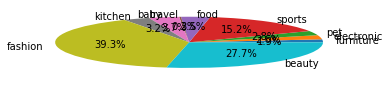

In [192]:
#clustering 1
F_20_sum = F_20_1[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 2)
plt.pie(F_20_sum, labels=labels, autopct='%1.1f%%')

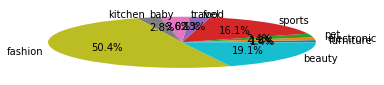

In [190]:
#clustering 2
F_20_sum = F_20_2[['CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3', 'CLAC0_4', 'CLAC0_5','CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9']].sum()
plt.subplot(3, 1, 3)
plt.pie(F_20_sum, labels=labels, autopct='%1.1f%%')
plt.show()

## SOM
- https://machinelearningnepal.com/2018/01/17/online-som/
- http://blog.yhat.com/posts/self-organizing-maps-2.html
- https://github.com/JustGlowing/minisom

In [193]:
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [205]:
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(F_20_drop)

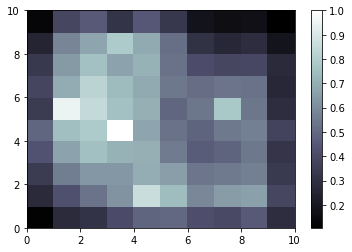

In [245]:
som = MiniSom(x = 10, y = 10, input_len = 33, learning_rate=0.1)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 5000)
bone()
pcolor(som.distance_map().T)
colorbar()

KeyboardInterrupt: 

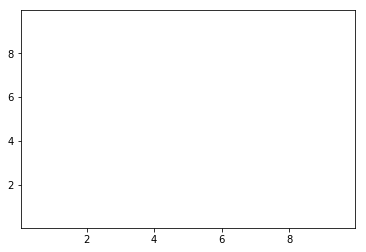

In [244]:
for cnt, xx in enumerate(X):
    w = som.winner(xx)  # getting the winner
    plt.plot(w[0]+.5, w[1]+.5)
    
plt.axis([0, 7, 0, 7])
plt.show()

In [199]:
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

NameError: name 'y' is not defined